In [1]:
#Miami, December 27th, 2019
#Renato Kogeyama

# Due bad performance, I am updating the script to more efficient coding

# This script generates a citation ouput with patent|backward citation|cumulated backward citation | year
# The output generates a citation record by year, considering direct and indirect citation


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plot

import sys
sys.path.append('/home/rkogeyam/scripts/')
from sampler import sampler


In [3]:
%matplotlib inline

In [4]:
fname = r'/home/rkogeyam/PATENT_CITATION/uspatentcitation.tsv'

In [5]:
%%time
# df=pd.read_csv(fname, sep='\t')

sample_size=100
df=sampler(fname, sample_size, sep='\t')

CPU times: user 5min 43s, sys: 16.6 s, total: 6min
Wall time: 6min 1s


In [6]:
df['patent_id']=df['patent_id'].astype(str)

In [7]:
df['citation_id']=df['citation_id'].astype(str)

In [8]:
df.dtypes

uuid           object
patent_id      object
citation_id    object
date           object
name           object
kind           object
country        object
category       object
sequence        int64
dtype: object

In [9]:
#Data Cleaning
# first, examine the data (patent and citation id)
len(df.citation_id)

67

In [10]:
# drop rows for which column citation_id has a length smaller than 5
indexNames = df[df['citation_id'].map(len) < 5].index
df.drop(indexNames , inplace=True)

In [11]:
df.shape

(67, 9)

In [12]:
# drop rows for which column patent_id has a length smaller than 5
indexNames = df[df['patent_id'].map(len) < 5].index
df.drop(indexNames , inplace=True)

In [13]:
df.shape

(67, 9)

In [14]:
%%time
#stripping non desired characters but keeping the originals for later check
#could merge unwanted information
cleaning_patent=lambda x:re.sub('([a-zA-Z0-9]+)', "", x)
df['citation_id'].apply(cleaning_patent)
df['patent_id'].apply(cleaning_patent)
# df['citation_id'] = df['citation_id'].str.extract('([a-zA-Z0-9]+)', expand=True)
# df['patent_id'] = df['patent_id'].str.extract('([a-zA-Z0-9]+)', expand=True)

CPU times: user 888 µs, sys: 0 ns, total: 888 µs
Wall time: 896 µs


In [15]:
%%time
#stripping trailing white spaces
df['patent_id'] = df['patent_id'].str.strip()
df['citation_id'] = df['citation_id'].str.strip()

CPU times: user 812 µs, sys: 0 ns, total: 812 µs
Wall time: 818 µs


In [16]:
%%time
#to avoid problems when converting object to datetime format
#replacing day or month would not affect the output
df.date.replace({'-00':'-01'}, regex=True, inplace=True)
#replacing the year could be more problematic
#for now, I am just dropping


CPU times: user 681 µs, sys: 0 ns, total: 681 µs
Wall time: 680 µs


In [17]:
%%time
df['date']=pd.to_datetime(df.date,format='%Y-%m-%d', errors='coerce') #attention to date format - original data is year-month-day
# df['date_format']=pd.to_datetime(df.date,format='%Y-%m-%d', errors='coerce')

CPU times: user 721 µs, sys: 35 µs, total: 756 µs
Wall time: 733 µs


In [18]:
%%time
#script will take grant year into account
df.sort_values(by='date', ascending=False, inplace=True)

CPU times: user 751 µs, sys: 0 ns, total: 751 µs
Wall time: 725 µs


In [19]:
%%time
#first, i'll run only patents with some kind of citation
#as we have many zero citations in the dataset, this should decrease processing time

cited_patents=df.groupby(['citation_id']).count().iloc[:, 1] #Series, patent-level

CPU times: user 2.43 ms, sys: 0 ns, total: 2.43 ms
Wall time: 2.27 ms


In [20]:
cited_patents.shape

(67,)

In [21]:
%%time
cited_patents.dropna(0, inplace=True) #Series

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 18.1 µs


In [22]:
cited_patents.shape

(67,)

In [23]:
%%time
cited_patents=cited_patents.reset_index() #Dataframe

CPU times: user 1.35 ms, sys: 17 µs, total: 1.37 ms
Wall time: 1.29 ms


In [24]:
%%time
df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


,uuid,patent_id,citation_id,date,name,kind,country,category,sequence
49,et9cvr5vcct9iftgqsswl1gj6,9027134,8782080,2014-07-01,Lee,B2,US,cited by applicant,5
4,12iriimyy7jsbep7jc9ncckij,9392377,8545383,2013-10-01,Wenzel et al.,B2,US,cited by applicant,225
13,3nflvfl33hsxg9e88bzkcz623,9586681,8360369,2013-01-01,Mercer et al.,B2,US,cited by applicant,34
9,1u0ikxq81pb618fh5rex0plff,9164803,8352611,2013-01-01,Maddhuri et al.,B2,US,cited by examiner,26
32,8eqjkzveibofstq8lgibcp3nl,9011492,8118838,2012-02-01,Winslow et al.,B2,US,cited by applicant,175
2,099x7x478xwtghd5999v20lmv,D759998,8079313,2011-12-01,Sparkowski,B2,US,cited by applicant,34
0,04ofwf6mh39qs9fswcxw05cja,9656143,7867115,2011-01-01,Zawitz,B2,US,cited by applicant,81
28,7wijyy10t5nvh3mz1g7um1qen,8471541,7859239,2010-12-01,Yamada,B2,US,cited by examiner,14
11,2qapmu0i7qe1lwodtx1to2k6f,D664205,D627791,2010-11-01,Lamb et al.,S,US,cited by examiner,6
58,hsta1jh6u3nudkn38gkmpbjje,9145915,7836613,2010-11-01,Koch et al.,B2,US,cited by examiner,22


In [25]:
%%time
cited_patents.rename(columns={'patent_id': 'back_citation'}, inplace=True)

CPU times: user 0 ns, sys: 666 µs, total: 666 µs
Wall time: 609 µs


In [26]:
%%time
df=df.merge(cited_patents, how='left', left_on='patent_id', right_on='citation_id')


CPU times: user 2.75 ms, sys: 37 µs, total: 2.79 ms
Wall time: 2.58 ms


In [27]:
df.head()

,uuid,patent_id,citation_id_x,date,name,kind,country,category,sequence,citation_id_y,back_citation
0,et9cvr5vcct9iftgqsswl1gj6,9027134,8782080,2014-07-01,Lee,B2,US,cited by applicant,5,NaN,NaN
1,12iriimyy7jsbep7jc9ncckij,9392377,8545383,2013-10-01,Wenzel et al.,B2,US,cited by applicant,225,NaN,NaN
2,3nflvfl33hsxg9e88bzkcz623,9586681,8360369,2013-01-01,Mercer et al.,B2,US,cited by applicant,34,NaN,NaN
3,1u0ikxq81pb618fh5rex0plff,9164803,8352611,2013-01-01,Maddhuri et al.,B2,US,cited by examiner,26,NaN,NaN
4,8eqjkzveibofstq8lgibcp3nl,9011492,8118838,2012-02-01,Winslow et al.,B2,US,cited by applicant,175,NaN,NaN


In [28]:
df.fillna(0, inplace=True)

In [29]:
cited_patents=df.groupby('citation_id_x').sum()

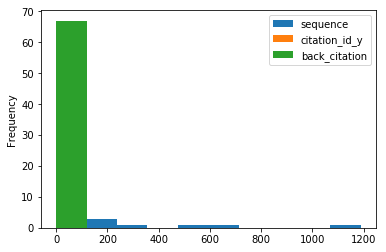

In [30]:
cited_patents.plot.hist()

In [35]:
# df=df.merge(cited_patents, how='left', left_on='patent_id', right_on='citation_id_y')

In [32]:
cited_patents.describe()

,sequence,citation_id_y,back_citation
count,67.000000,67.0,67.0
mean,65.582090,0.0,0.0
std,178.195343,0.0,0.0
min,0.000000,0.0,0.0
25%,3.000000,0.0,0.0
50%,8.000000,0.0,0.0
75%,34.000000,0.0,0.0
max,1188.000000,0.0,0.0


In [36]:
df.describe()

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,sequence_x,citation_id_y_x,back_citation_x,sequence_y,citation_id_y_y,back_citation_y
count,67.000000,67.0,67.0,0.0,0.0,0.0
mean,65.582090,0.0,0.0,NaN,NaN,NaN
std,178.195343,0.0,0.0,NaN,NaN,NaN
min,0.000000,0.0,0.0,NaN,NaN,NaN
25%,3.000000,0.0,0.0,NaN,NaN,NaN
50%,8.000000,0.0,0.0,NaN,NaN,NaN
75%,34.000000,0.0,0.0,NaN,NaN,NaN
max,1188.000000,0.0,0.0,NaN,NaN,NaN


In [34]:
# # cited_patents.iloc[0].citation_id

# # cited_patents.apply(lambda x: df[df.citation_id=='2673233'].patent_id) #so far, it returns a list of patents citing each cited patent

# cited_patents['cumulative']=cited_patents['back_citation']

# # search for citations in df
# # df[df.citation_id=='4025107'].patent_id #series of patents citing '4025107'

# # get cumulative data from cited_patents and sum
# # cited_patents[cited_patents.citation_id=='4025107'].cumulative.sum()

# %%time
# # chained functions
# # cited_patents['cumulative']=cited_patents.apply(lambda x:df[df.citation_id==x].patent_id.apply(lambda y:cited_patents[cited_patents.citation_id==y].cumulative.sum()))

# %%time
# # cumulative=lambda row: cited_patents[df.patent_id==row.citation_id].patent_id.sum()

# # cited_patents['cumulative']=cited_patents.apply(cumulative, axis=1)

# cited_patents.shape

# cited_patents

# # %%time
# # for i in cited_patents.index:
    
# #     citing_patents=df[df.citation_id==i].patent_id  #this is the trick element
# #                                                     #for each cited patent i generate a list of citing patents

# #     cumulative=0 #initialize the citation cumulated variable for each cited patent

# #     cited_patents['cumulative']=(lambda row: df[df.citation_id==row.index].sum().cumulative)
# #     print('Patent:', j, 'Cumulative citations:', cumulative)
        

    
    
# #     #     for j in citing_patents:
# # #         cumulative=+df[df.citation_id==j].sum().cumulative #each cited patent contributes to overall cumulative score

# # #     print(cited_patents.loc[cited_patents['citation_id']==i,'cumulative'])
# # #     cited_patents.at[i,'cumulative']=+cumulative
    

# %%time
# cited_patents.shape

# %%time
# cited_patents.describe()

